In [8]:
#Packages
import pandas as pd
import seaborn as sns
import sklearn as skl
import datetime as dt
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [295]:
#Variables
startDate = '2011/02/01'
endDate = '2021/02/01'
monthsOut = 12

#make sure to enter your path
excelOutputFolder = r'C:\Users\adamd\Desktop\Hobbies and Things\PandasOutputExtracts\\'

colCng = {
    "DGS1MO": "10YearTreasury",
    "CPIAUCSL": "CPI",
    "PPIACO": "PPI",
    "T10YIE": "Inflation",
    "VIXCLS":"Volatility",
    "UNRATE":"Unemployement Rate", 
    "IMPGSC1" : "Real Imports",
    "NETEXC" : "Real Exports"
}

In [296]:
#Script for predictive

#pull Dependent Variables from Yahoo Finance
dfDa = data.DataReader(['AAPL','TSLA','SPY'], 'yahoo', start=startDate, end=endDate)
dfDa = dfDa['Adj Close']
dfDa = dfDa.reset_index()
dfDa
dfDa['month'] = dfDa['Date'].dt.month
dfDa['year'] = dfDa['Date'].dt.year
dfDa['month and year'] = pd.to_datetime(dfDa['month'].astype(str) + "/" + dfDa['year'].astype(str))
dfDa = dfDa.drop(['month', 'year'], axis=1)
dfDa = dfDa.groupby(['month and year']).mean()
dfDa = dfDa.reset_index()
dfDa['month and year pred'] = dfDa['month and year']  - pd.DateOffset(months=monthsOut)
dfDa

#pull Independent Variables from FRED
dfCa = data.DataReader(['DGS1MO','CPIAUCSL','T10YIE','VIXCLS','UNRATE','GDP','PPIACO','IMPGSC1','NETEXC'], 'fred', start=startDate, end=endDate)
dfCa = dfCa.reset_index()
dfCa
dfCa['month'] = dfCa['DATE'].dt.month
dfCa['year'] = dfCa['DATE'].dt.year
dfCa['month and year2'] = pd.to_datetime(dfCa['month'].astype(str) + "/" + dfCa['year'].astype(str))
dfCa = dfCa.drop(['month', 'year'], axis=1)
dfCa = dfCa.fillna(method="ffill")
dfCa = dfCa.groupby(['month and year2']).mean()
dfCa = dfCa.reset_index()
dfCa

#Join into singe DF
dfDC = dfDa.set_index('month and year pred').join(dfCa.set_index('month and year2'))
dfDC = dfDC.reset_index()
dfDC = dfDC.sort_values(by='month and year pred')
dfDC

#Swap out header names
dfDC[colCng['DGS1MO']]=dfDC['DGS1MO']
dfDC[colCng['CPIAUCSL']]=dfDC['CPIAUCSL']
dfDC[colCng['T10YIE']]=dfDC['T10YIE']
dfDC[colCng['VIXCLS']]=dfDC['VIXCLS']
dfDC[colCng['UNRATE']]=dfDC['UNRATE']
dfDC[colCng['PPIACO']]=dfDC['PPIACO']
dfDC[colCng['IMPGSC1']]=dfDC['IMPGSC1']
dfDC[colCng['NETEXC']]=dfDC['NETEXC']
dfDC = dfDC.drop(['DGS1MO','CPIAUCSL','T10YIE','VIXCLS','UNRATE','PPIACO','IMPGSC1','NETEXC'], axis=1)
dfDC = dfDC.dropna(axis='rows')

#Post Source Data
dfDC

,month and year pred,month and year,AAPL,TSLA,SPY,GDP,10YearTreasury,CPI,Inflation,Volatility,Unemployement Rate,PPI,Real Imports,Real Exports
14,2011-04-01,2012-04-01,18.610845,6.699000,115.797187,15557.535,0.029524,224.093,2.591429,16.170000,9.1,203.1,2681.865,-559.544
15,2011-05-01,2012-05-01,17.341574,6.154727,112.226023,15557.535,0.024783,224.806,2.393043,16.776957,9.0,204.1,2681.865,-559.544
16,2011-06-01,2012-06-01,17.645279,6.124667,110.958976,15557.535,0.019091,224.806,2.246818,19.153182,9.1,203.9,2681.865,-559.544
17,2011-07-01,2012-07-01,18.459293,6.208381,114.161012,15647.681,0.036190,225.395,2.382857,19.067619,9.0,204.6,2711.619,-560.145
18,2011-08-01,2012-08-01,19.801289,5.808956,118.081904,15647.681,0.017391,226.106,2.167826,35.029130,9.0,203.2,2711.619,-560.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019-10-01,2020-10-01,115.842520,427.209545,337.319798,21694.458,1.726957,257.387,1.560870,15.466522,3.6,198.6,3400.888,-847.577
117,2019-11-01,2020-11-01,116.414979,465.612498,350.616466,21694.458,1.585714,257.989,1.643333,12.486667,3.6,199.0,3400.888,-847.577
118,2019-12-01,2020-12-01,126.885002,638.818640,365.565930,21694.458,1.554348,258.203,1.714783,13.660000,3.6,199.0,3400.888,-847.577
119,2020-01-01,2021-01-01,132.613088,828.776839,375.714665,21481.367,1.531304,258.687,1.724348,13.853913,3.5,199.3,3283.928,-841.877


In [297]:
#Correlation Grid
corrgrid = dfDC.corr()
corrgrid

,AAPL,TSLA,SPY,GDP,10YearTreasury,CPI,Inflation,Volatility,Unemployement Rate,PPI,Real Imports,Real Exports
AAPL,1.000000,0.871847,0.904941,0.853851,0.792752,0.879610,-0.443502,-0.158089,-0.720477,-0.052790,0.750533,-0.746828
TSLA,0.871847,1.000000,0.677763,0.580380,0.467158,0.622013,-0.347299,-0.108835,-0.455273,-0.023596,0.422076,-0.428888
SPY,0.904941,0.677763,1.000000,0.973612,0.841216,0.978557,-0.503624,-0.327895,-0.919529,-0.216662,0.924089,-0.882763
GDP,0.853851,0.580380,0.973612,1.000000,0.874984,0.991092,-0.532111,-0.320666,-0.957703,-0.235493,0.977581,-0.934466
10YearTreasury,0.792752,0.467158,0.841216,0.874984,1.000000,0.891737,-0.224171,-0.121000,-0.731610,0.095187,0.854017,-0.844784
CPI,0.879610,0.622013,0.978557,0.991092,0.891737,1.000000,-0.454283,-0.328292,-0.929758,-0.134461,0.951176,-0.897944
Inflation,-0.443502,-0.347299,-0.503624,-0.532111,-0.224171,-0.454283,1.000000,-0.048254,0.630214,0.770254,-0.560373,0.604971
Volatility,-0.158089,-0.108835,-0.327895,-0.320666,-0.121000,-0.328292,-0.048254,1.000000,0.396257,0.058891,-0.296214,0.165709
Unemployement Rate,-0.720477,-0.455273,-0.919529,-0.957703,-0.731610,-0.929758,0.630214,0.396257,1.000000,0.404767,-0.966466,0.907753
PPI,-0.052790,-0.023596,-0.216662,-0.235493,0.095187,-0.134461,0.770254,0.058891,0.404767,1.000000,-0.309732,0.389311


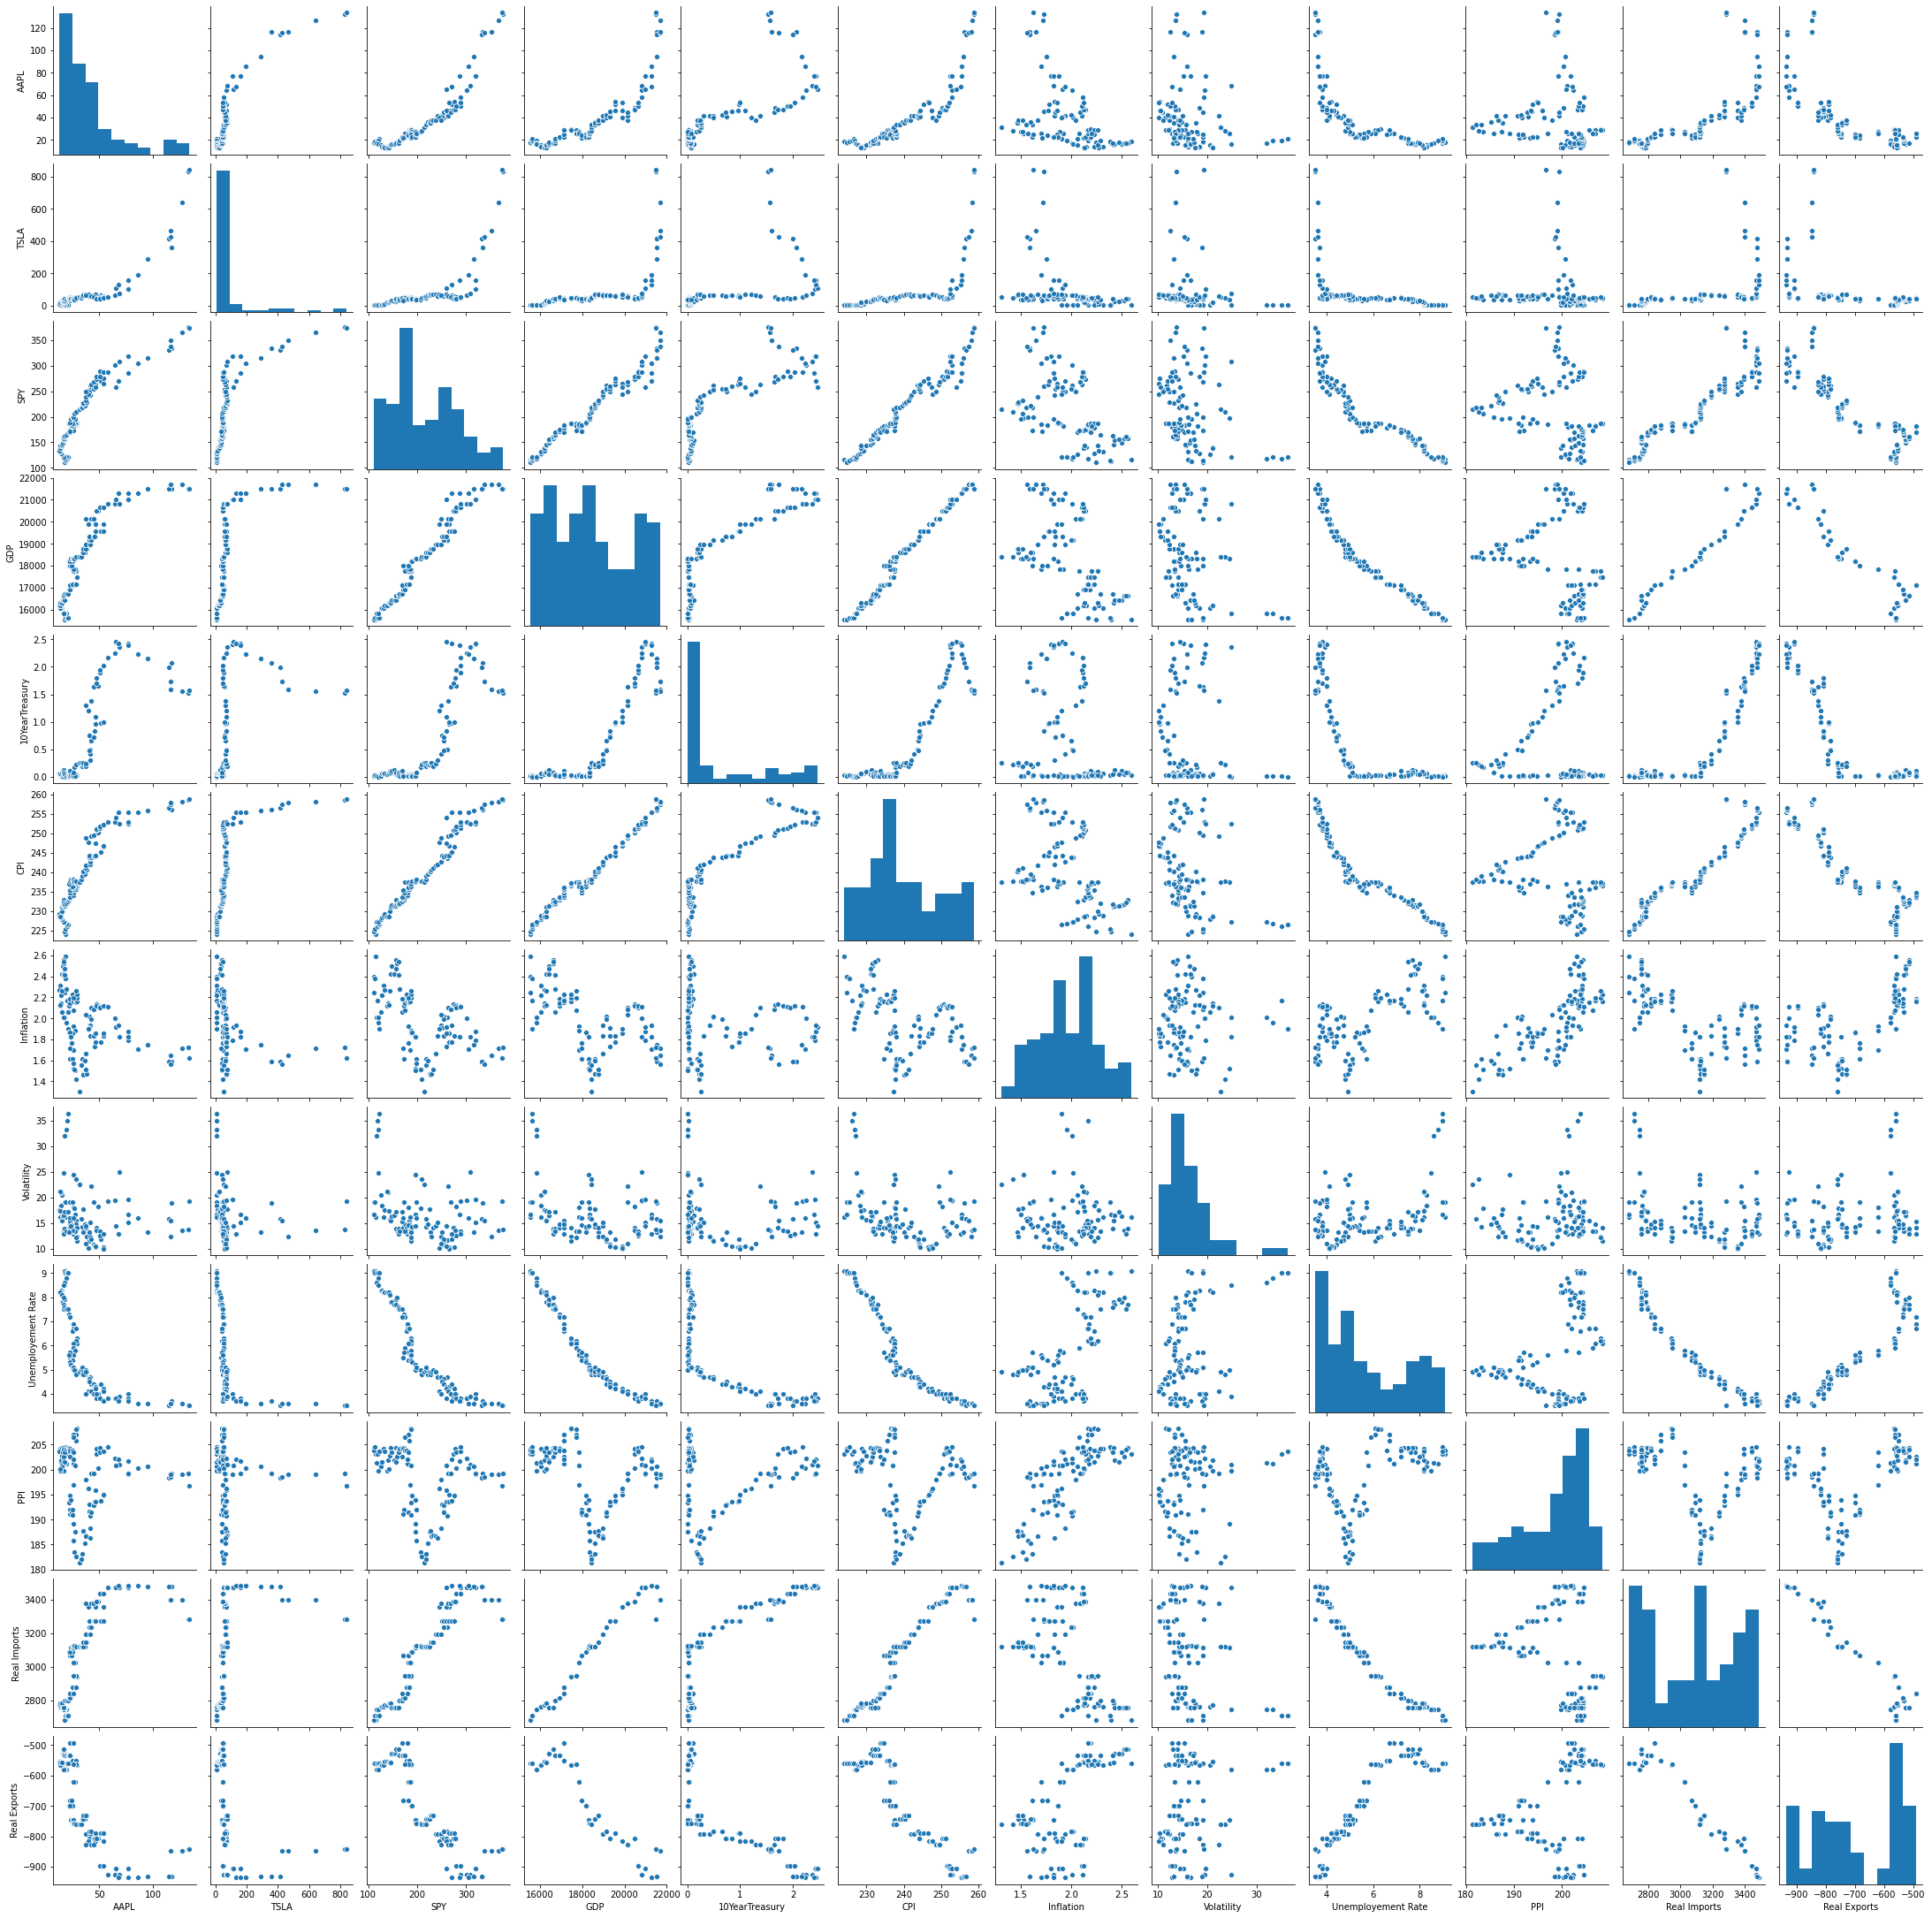

In [298]:
#Scatter Plots
sns.pairplot(dfDC)

Coefficients: 
 [-8.97735166e+00  3.49170248e+00  6.34962594e-03  2.16897775e-03]
YIntercept: 
 -696.1976006591963


Text(0, 0.5, 'Predicted Y')

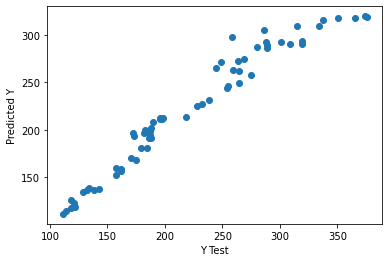

In [333]:
#Linear Model
#'Inflation','CPI','Personal Consumption','10YearTreasury','Unemployement Rate','Real Imports','Real Exports'
y = dfDC['SPY']
X= dfDC[['Unemployement Rate','CPI','GDP','Real Imports']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)#, random_state=9)
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)
print('YIntercept: \n', lm.intercept_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

MAE: 12.512008086668722
MSE: 309.904637434482
RMSE: 17.604108538477092


,Unemployement Rate,CPI,GDP,Real Imports,0
Coeffecient,-8.977352,3.491702,0.00635,0.002169,-696.197601


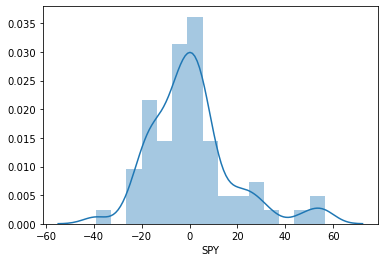

In [336]:
#Error Functions and Histogram
sns.distplot((y_test-predictions),bins=15);
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
coeffecients = pd.DataFrame(lm.coef_,X.columns).append([lm.intercept_])
coeffecients.columns = ['Coeffecient']
coeffecients = coeffecients.transpose()
coeffecients

In [335]:
#Export all data to excel
dfDC.to_excel(excelOutputFolder+"Model Output Data.xlsx")
coeffecients.to_excel(excelOutputFolder+"Coeffecients.xlsx")
corrgrid.to_excel(excelOutputFolder+"CorreltationGrid.xlsx")